# Chapter 09 and 10 Exercises

## Jae Wook Jung

### Feb. 28. 2020

# Chapter 9 

## Q1) Measuring $\bar{Y_t}$ and $\tilde{Y_t}$

__(a)__ Judging the state of the economy is a real-world problem faced by policymakers, forecasters, and businesses every day. Understanding what constitutes a business cycle is the first step in the road to greater understanding of your economic surroundings. Please create a Dataframe with the same structure as the table below:  

| Year | Actual Output $Y_t$ | Potential Output $Y_t$ | Short-run output $\tilde{Y_t}$ | Yearly growth rate of actual output % $\delta Y$|
|------|---------------------|------------------------|--------------------------------|-------------------------------------------------|
| 1950 |            .        |            .           |              .                 |                     .                           |
| 1951 |            .        |            .           |              .                 |                     .                           | 
| .    |            .        |            .           |              .                 |                     .                           | 
| .    |            .        |            .           |              .                 |                     .                           | 
| .    |            .        |            .           |              .                 |                     .                           |   
| 2017 |            .        |            .           |              .                 |                     .                           | 
| 2018 |            .        |           .            |              .                 |                     .                           | 


* Use Quarterly US Real GDP - FRED series `GDPC1`- for actual output
* Use Quarterly US Potential Real GDP - FRED series `GDPPOT`- for potential output 


In [1]:
import numpy as np
import pandas as pd

#Step 1: Import the FRED series
Real_GDP = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W09\GDPC1.csv", header = 0, names = ["Date", "R_GDP"])
Real_potential = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W09\GDPPOT.csv", header = 0, names = ["Date", "R_potential"])

#Step 2: Create arrays for each variable in the df
Year = []
Yt = []
Yt_bar = []
i = 0

for i in range(0, 284):
    Year = np.append(Year, Real_GDP["Date"][i + 8])
    Yt = np.append(Yt, Real_GDP["R_GDP"][i + 8])
# print(Year[0])  1949-01-01
# print(Yt[283])  2019-10-01
# print(Year[283]) 2019-10-01
i = 0
for i in range(0, 284):
    Yt_bar = np.append(Yt_bar, Real_potential["R_potential"][i])
# print(Yt_bar[283])  2019-10-01

i = 0
change_Yt =[0]

for i in range(0, 283):
    i += 1
    change_Yt = np.append(change_Yt, ((Yt[i] - Yt[i - 1]) / Yt[i - 1]) * 100)

#Step 3: Create a dictionary
df = pd.DataFrame({"Year": Year, "Actual Output Yt": Yt, "Potential Output Yt": Yt_bar},
                   columns = ["Year", "Actual Output Yt", "Potential Output Yt"])
df["Short-run Output Yt"] = ((df["Actual Output Yt"] - df["Potential Output Yt"]) / df["Potential Output Yt"]) * 100
df["Yearly growth rate of actual output % dYt"] = change_Yt

df["Year"] = np.array(df["Year"], dtype = np.datetime64)
# df["Year"] = pd.to_datetime(df["Year"])
# df["Year"] = (df["Year"]).dt.year
#Step 4: Create the dataframe
df


,Year,Actual Output Yt,Potential Output Yt,Short-run Output Yt,Yearly growth rate of actual output % dYt
0,1949-01-01,2105.562,2105.424751,0.006519,0.000000
1,1949-04-01,2098.380,2133.335241,-1.638525,-0.341097
2,1949-07-01,2120.044,2162.374385,-1.957588,1.032415
3,1949-10-01,2102.251,2190.094474,-4.010945,-0.839275
4,1950-01-01,2184.872,2219.369859,-1.554399,3.930121
...,...,...,...,...,...
279,2018-10-01,18783.548,18711.030000,0.387568,0.271333
280,2019-01-01,18927.281,18806.420000,0.642658,0.765207
281,2019-04-01,19021.860,18903.140000,0.628044,0.499697
282,2019-07-01,19121.112,19000.870000,0.632824,0.521779


__(b)__ Create a three plots. One containing of two time series, actual output and potential output. The second containing the time series for short-run output. Lastly, a graph of the yearly growth rate of actual output.

In [2]:
import matplotlib.pyplot as plt

plt.plot(df["Year"], Yt, "red", label = "Actual Output")
plt.plot(df["Year"], Yt_bar, "green", label = "Potential Output")
plt.title("Yt & Yt_bar")
plt.xlabel("Year")
plt.ylabel("Billions of chaied 2012 dollars")
plt.legend()
# plt.xticks(["1949", "1960", "1970", "1980", "1990", "2000", "2010", "2019"])
plt.show()

plt.plot(df["Year"], df["Short-run Output Yt"], "black", label = "Short-run Output")
plt.title("Short-run Output")
plt.xlabel("Year")
plt.ylabel("percentage")
plt.legend()
plt.show()

plt.plot(df["Year"], df["Yearly growth rate of actual output % dYt"],  label = "%change")
plt.title("Yearly growth rate")
plt.xlabel("Year")
plt.ylabel("percentage")
plt.legend()
plt.show()

C:\Users\Jae\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

__(c)__ Comment on the state of the economy in each year. When does the economy enter a recession? When does the recession end? 

The years that the short-run outputs go down under 0%, the recessions start. There are some years that short-run outputs go under the zero percent on the graph. Bouncing up from the very bottom of the peak is when a recession ends.

__(d)__ How is your answer in part (c) related to the growth rate of the actual output?

Yearly growth rate of the actual output drops when the short-run outputs drop. Since when the short-run output bounces from the very bottom peak, yearly growth rate of the actual output drop is coming back to positive percentage from the negative percentage.

__(e)__ Is there a pattern to the timing and severity of recessions? What are the life implications of your answer?

Every after the highest peak of the short-run output, the short-run output drops to the negative percentage which is a recession starts. But the thing is we don't know when is the highest at moments. Seems like almost every 5 years we are having recessions.

## Q2) An Oil Shock

Consider an economy that begins with output at its potential level and a relatively high inflation rate of $6\%$, reflecting some recent oil price shocks. As the head of the Federal Reserve, your job is to pick a sequence of short-run output levels that will get the rate of inflation back down to $3\%$ no later than 3 years from now. Your expert staff offers you the following policy menu options.

$$
\text{Short Run Output}
$$

| Option | Year 1 | Year 2 | Year 3 | 
|--------|--------|--------|--------|
| 1      | -6%    | 0      |  0     |
| 2      | -4%    | -2%    |  0     | 
| 3      | -2%    | -2%    |   -2%  |

$$
\text{Inflation}
$$

| Option | Year 1 | Year 2 | Year 3 | 
|--------|--------|--------|--------|
| 1      | 3%     | 3%     |  3%    |
| 2      | 4%     | 3%     |  3%    | 
| 3      | 5%     | 4%     |   3%   |



__(a)__ The policy options provided imply a particular Phillips curve. Please use the data points provided to plot the underlying Phillips curve. What is the slope of this Phillips curve?

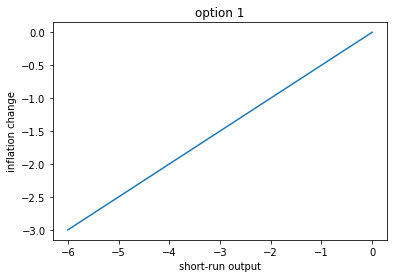

slope = inf_change / short-run: 0.5


In [3]:
# change_inf / short-run_output = slope of the Phillips curve

# yr0 = y_bar, inflation rate 6%. 

# opt1) 
#short-run output    inf
#yr0) 0              6
#yr1) -6             3
#yr2) 0              3
#yr3) 0              3
short_run1 = [-6, 0, 0]
inf_change1 = [-3, 0, 0]

plt.plot(short_run1, inf_change1)
plt.title("option 1")
plt.xlabel("short-run output")
plt.ylabel("inflation change")
plt.show()

print("slope = inf_change / short-run: 0.5" )

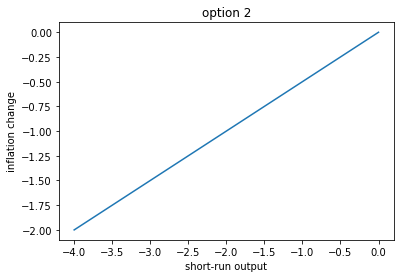

slope = inf_change / short-run: 0.5


In [4]:
# opt2) 
#short-run output inf
#yr0) 0            6
#yr1) -4           4
#yr2) -2           3
#yr3) 0            3
short_run2 = [-4, -2, 0]
inf_change2 = [-2, -1, 0]

plt.plot(short_run2, inf_change2)
plt.title("option 2")
plt.xlabel("short-run output")
plt.ylabel("inflation change")
plt.show()

print("slope = inf_change / short-run: 0.5")

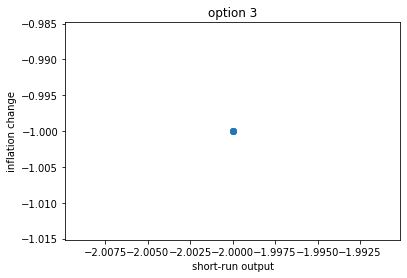

slope = inf_change / short-run: 0


In [5]:
# opt3) 
#short-run output inf
#yr0) 0           6
#yr1) -2          5
#yr2) -2          4
#yr3) -2          3
short_run3 = [-2, -2, -2]
inf_change3 = [-1, -1, -1]

plt.scatter(short_run3, inf_change3)
plt.title("option 3")
plt.xlabel("short-run output")
plt.ylabel("inflation change")
plt.show()

print("slope = inf_change / short-run: 0", )

__(b)__ If you as a policymaker cared primarily about output and not much about the inflation rate, which option would you recommend? Why? 

option 3. Short-run output has to drop to drop the inflation. By dropping the short-run output little by little not to give a big shock to the economy suddenly. And dropping the inflation rate little by little.

__(c)__ If you cared primarily about inflation and not much about output, which option would you recommend? Why?

Option 1. Just to meet the inflation to 3%, just do it not thinking about short-run output. Dropping 6% of short-run output can be a big chaos to the economy

__(d)__ Explain the general trade-off that policymakers face according to the Phillips curve.

If the policymakers want the inflation drop, they have to drop the short-run output, too. The inflation rate and short-run output is in positive relationship.

## Q3) Okun's Law

Suppose the economy has a natural rate of unemployment of 5%. 

__(a)__ Suppose short-run output over the next 4 years is 1%, 0%, -2%, and -2%. According to Okun's law, what unemployment rates would we expect to see in this economy?

yr1 = (u - 5) / 1 = -0.5\
yr2 = (u - 5) / 0 = -0.5\
yr3 = (u - 5) / -2 = -0.5\
yr4 = (u - 5) / -2 = -0.5

yr1) unemployment rate = 4.5\
yr2) unemployment rate = 5\
yr3) unemployment rate = 4\
yr4) unemployment rate = 4

__(b)__ Consider another economy in which the unemployment rate over the next 3 years is 6%, 7%, and then 4%. According to Okun's law, what are the levels of short-run output $\tilde{Y_t}$ in this economy?

u - u_bar / slope(= -0.5)(?) = short-run output

yr1) 6 - 5, 1 / (-0.5) = -2(short-run output)\
yr2) 7 - 5, 2 / (-0.5) = -4(short-run output)\
yr3) 4 - 5, -1 / (-0.5) = 2(short-run output)

__(c)__ Suppose that the slope of the linear function in Figure 9.8 in your book (page 248) is not $\frac{1}{2}$ but $\frac{1}{3}$. What are the implications of this change on your estimates for parts __(a)__ and __(b)__ of this question? Please give numerical answers and provide a written analysis below.

(a) will not be affected.\
(b)\
yr1) 1 / (1/3) = 3(short-run output)\
yr2) 2 / (1/3) = 6(short-run output)\
yr3) -1 / (1/3) = -3(short-run output)

## Q3) Another version of the Phillips Curve

A more widely used version of the Phillips curve depicts the relationship between inflation and unemployment. We use inflation and unemployment because there is easily accesible data on these indicators from the US BLS and because obtaining estimates of potential output are difficult and sensitive to the assumptions we used to calculate them. 

__(a)__ Please write down the equation for the Phillips curve linking inflation and short run output $\tilde{Y}$ (depicted in figure 9.6 of your texbook on page 244.)

change_inf = 1/3 * short-run output

__(b)__ The equation for Okun's Law is $u-\bar{u}=-\frac{\tilde{Y}}{2}$. Combine the equation for the Phillips curve from part __(a)__ and the Okun's Law equation to create a theoretical expression for the Phillips curve depicting the relationship between changes in inflation and cyclical unemployment. 

u - u_bar = -3/2 * change_inf

__(c)__ How does the slope of Okun's Law and the slope of the Phillips curve influence the relationship between changes in inflation and cyclical unemployment?

when inflation rises 2 percent, cyclical unemployment falls -3 percent.

__(d)__ Go to FRED and download the series for US inflation rate (BPCCRO1Q156NBEA), civilian unemployment rate (UNRATE), and natural rate of unemployment(NROU) from 1960 to the current year. Using those series calculate quarterly cyclical unemployment ($u-\bar{u}$) and changes in the quarterly inflation rate ($\Delta \pi = \pi_{Q_{i}}-\pi_{Q_{i-1}}$) for every quarter in the data. Use a scatter plot to illustrate the statistical relationship between $\Delta \pi$ and $u-\bar{u}$. Make sure to put $\Delta \pi$ on the y-axis.

In [6]:
inf_rate = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W09\inflation rate_quarterly.csv", header = 0, names = ["Date", "Inf_rate"])
un_rate = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W09\unemployment rate_quarterly.csv", header = 0, names = ["Date", "Un"])
naun_rate = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W09\natural unemployment rate_quarterly.csv", header = 0, names = ["Date", "Naun"])
print(naun_rate["Date"][44+239])
print(inf_rate["Date"][0+239])
print(un_rate["Date"][48+239])
print(naun_rate)

Y = []
inf = []
un = []
naun = []
change_inf = [0]

i = 0
for i in range(0, 240):
    inf = np.append(inf, inf_rate["Inf_rate"][i])
    Y = np.append(Y, inf_rate["Date"][i])
    
i = 0
for i in range(0, 240):
    un = np.append(un, un_rate["Un"][i + 48])

i = 0
for i in range(0, 240):
    naun = np.append(naun, naun_rate["Naun"][i + 44])
    
i = 0
for i in range(0, 239):
    change_inf = np.append(change_inf, inf[i] - inf[i - 1])

df1 = pd.DataFrame({"Year": Y, "Inflation rate": inf, "Unemployment rate": un, "Natural unemployment rate": naun, "Inflation change": change_inf}, 
                    columns = ["Year", "Inflation rate", "Unemployment rate", "Natural unemployment rate", "Inflation change"])

df1["Cyclical unemployment"] = df1["Unemployment rate"].astype(float) - df1["Natural unemployment rate"]

df1


2019-10-01
2019-10-01
2019-10-01
           Date      Naun
0    1949-01-01  5.255053
1    1949-04-01  5.261516
2    1949-07-01  5.268013
3    1949-10-01  5.274564
4    1950-01-01  5.281182
..          ...       ...
323  2029-10-01  4.210983
324  2030-01-01  4.203966
325  2030-04-01  4.196964
326  2030-07-01  4.189984
327  2030-10-01  4.183028

[328 rows x 2 columns]


,Year,Inflation rate,Unemployment rate,Natural unemployment rate,Inflation change,Cyclical unemployment
0,1960-01-01,2.1,5.1333333333333333,5.456452,0.0,-0.323119
1,1960-04-01,1.9,5.2333333333333333,5.463051,0.5,-0.229718
2,1960-07-01,1.7,5.5333333333333333,5.469830,-0.2,0.063504
3,1960-10-01,1.4,6.2666666666666667,5.476770,-0.2,0.789897
4,1961-01-01,1.3,6.8000000000000000,5.483875,-0.3,1.316125
...,...,...,...,...,...,...
235,2018-10-01,1.9,3.8000000000000000,4.474808,0.0,-0.674808
236,2019-01-01,1.6,3.8666666666666667,4.467318,-0.1,-0.600652
237,2019-04-01,1.6,3.6333333333333333,4.459941,-0.3,-0.826608
238,2019-07-01,1.7,3.6333333333333333,4.452636,0.0,-0.819303


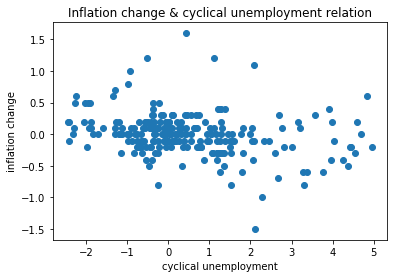

In [7]:
plt.scatter(df1["Cyclical unemployment"], df1["Inflation change"])
plt.title("Inflation change & cyclical unemployment relation")
plt.xlabel("cyclical unemployment")
plt.ylabel("inflation change")
plt.show()

In [8]:
print(Real_GDP["Date"][52])

Year1 = []
Yt1 = []
change_inf1 = [0]
i = 0
for i in range(0, 240):
    Year1 = np.append(Year1, Real_GDP["Date"][i + 52])
    Yt1 = np.append(Yt1, Real_GDP["R_GDP"][i + 52])
    
i = 0
for i in range(0, 239):
    change_inf1 = np.append(change_inf1, inf[i] - inf[i - 1])
    
df2 = pd.DataFrame({"Year": Year1, "Actual output": Yt1, "Inflation change": change_inf1},
                    columns = ["Year", "Actual output", "Inflation change"])

df2["Short-run Output Yt"] = ((df["Actual Output Yt"] - df["Potential Output Yt"]) / df["Potential Output Yt"]) * 100

df2

1960-01-01


,Year,Actual output,Inflation change,Short-run Output Yt
0,1960-01-01,3275.757,0.0,0.006519
1,1960-04-01,3258.088,0.5,-1.638525
2,1960-07-01,3274.029,-0.2,-1.957588
3,1960-10-01,3232.009,-0.2,-4.010945
4,1961-01-01,3253.826,-0.3,-1.554399
...,...,...,...,...
235,2018-10-01,18783.548,0.0,0.196502
236,2019-01-01,18927.281,-0.1,-0.840211
237,2019-04-01,19021.860,-0.3,-0.766213
238,2019-07-01,19121.112,0.0,-1.705192


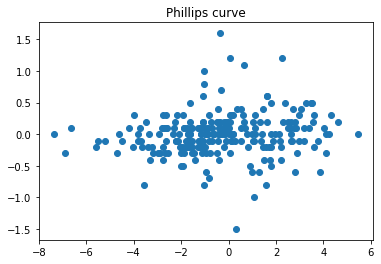

In [9]:
plt.scatter(df2["Short-run Output Yt"], df2["Inflation change"])
plt.title("Phillips curve")
plt.show()

In [10]:
Yt2 = []
un1 = []
naun1 = []

i = 0
for i in range(0, 240):
    Yt2 = np.append(Yt2, Real_GDP["R_GDP"][i + 52])
    
i = 0
for i in range(0, 240):
    un1 = np.append(un1, un_rate["Un"][i + 48])

i = 0
for i in range(0, 240):
    naun1 = np.append(naun1, naun_rate["Naun"][i + 44])
    
df3 = pd.DataFrame({"Actual output": Yt2, "Unemployment": un1, "Natural unemployment": naun1},
                  columns = ["Actual output", "Unemployment", "Natural unemployment"])

df3["Cyclical Unemployment"] = df3["Unemployment"].astype(float) - df3["Natural unemployment"]
df3["Short-run Output Yt"] = ((df["Actual Output Yt"] - df["Potential Output Yt"]) / df["Potential Output Yt"]) * 100

df3

,Actual output,Unemployment,Natural unemployment,Cyclical Unemployment,Short-run Output Yt
0,3275.757,5.1333333333333333,5.456452,-0.323119,0.006519
1,3258.088,5.2333333333333333,5.463051,-0.229718,-1.638525
2,3274.029,5.5333333333333333,5.469830,0.063504,-1.957588
3,3232.009,6.2666666666666667,5.476770,0.789897,-4.010945
4,3253.826,6.8000000000000000,5.483875,1.316125,-1.554399
...,...,...,...,...,...
235,18783.548,3.8000000000000000,4.474808,-0.674808,0.196502
236,18927.281,3.8666666666666667,4.467318,-0.600652,-0.840211
237,19021.860,3.6333333333333333,4.459941,-0.826608,-0.766213
238,19121.112,3.6333333333333333,4.452636,-0.819303,-1.705192


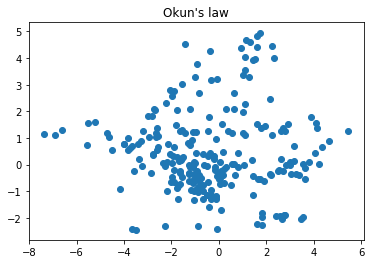

In [11]:
plt.scatter(df3["Short-run Output Yt"], df3["Cyclical Unemployment"])
plt.title("Okun's law")
plt.show()

__(d)__ Please comment on the scatter plot you created in part __(c)__. Please, no one-liners. Show me that you can think about the data and it's implications.

I can't see the trend of the slope which is -3/2 based on my graph. The slope is almost flat. I thought I would have more clear slope if I have massive datas. But when I see the outliers I can see that change in inflation is positive, cyclical unemployment rate is negative. And if the change in inflation is negative, cyclical unemployment rate is positive.

# Chapter 10

## Q5) The IGM Economic Forum:

The University of Chicago Booth School of Business hosts an online panel of economic experts every two weeks or so to consider a timely economic question. A specific economic opinion is put forward, and the experts either agree or disagree. Most of the questions are about macroeconomics and financial stability, but many are about other interesting issues in economics. 

__(a)__ Browse through a few past questions at [www.igmchicago.org/img-economic-experts-panel](http://www.igmchicago.org/igm-economic-experts-panel) (or by searching for "IGM forum Chicago"). Choose one question related to the topics in this chapter and report your choice. 

Payday lending. A ban on very short-term loans at very high annualized interest rates (aka payday lending) would make most people who use or might use them better off.
Payday lending is a very short-term loan.

__(b)__ Is there a fair amount of agreement or disagreement among the economic panel? Please no one-liners. Show me that you read.

There is no strongly agree, but there are 2 percent of strongly disagree. Agree is 33 percent which is 10 percent higher than disagree. Uncertain is the highest with 37 percent. Uncertain goes up to 42 percent with weighted by each confidence. And still 30 percent of agree is higher than disagree by 5 percent. With weighted confidence, agree percentage went down slightly, and disagree percentage went up slightly. Seems like experts are not sure in average how the people whose using payday will do.

__(c)__ What are your thoughts on the question you chose? Who do you side with? Why?

Uncertain. Also, I'm not sure which will be good or bad. There will be some people who desperately need quick money and who can manage money. But there will be people who use payday loan who is bad creditors. So if the payday loan is banned, those who borrow money will have hard life without money but at the same time no more money to payback to the institution. But it can be not benefit who really needs money in that way. 